In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to [0, 1] and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to include channel dimension (for grayscale images)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [18]:
# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)               0

In [19]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 45s 58ms/step - loss: 0.5700 - accuracy: 0.7894 - val_loss: 0.3948 - val_accuracy: 0.8569
Epoch 2/10
750/750 [==============================] - 43s 58ms/step - loss: 0.3577 - accuracy: 0.8697 - val_loss: 0.3410 - val_accuracy: 0.8766
Epoch 3/10
750/750 [==============================] - 46s 61ms/step - loss: 0.3071 - accuracy: 0.8891 - val_loss: 0.2989 - val_accuracy: 0.8905
Epoch 4/10
750/750 [==============================] - 45s 60ms/step - loss: 0.2765 - accuracy: 0.8985 - val_loss: 0.2851 - val_accuracy: 0.8957
Epoch 5/10
750/750 [==============================] - 43s 57ms/step - loss: 0.2523 - accuracy: 0.9075 - val_loss: 0.2753 - val_accuracy: 0.8979
Epoch 6/10
750/750 [==============================] - 46s 61ms/step - loss: 0.2294 - accuracy: 0.9155 - val_loss: 0.2667 - val_accuracy: 0.9038
Epoch 7/10
750/750 [==============================] - 45s 60ms/step - loss: 0.2113 - accuracy: 0.9211 - val_loss: 0.2736 - val_accuracy:

In [20]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


313/313 [==============================] - 3s 9ms/step - loss: 0.2671 - accuracy: 0.9090
Test Accuracy: 90.90%


1/1 [==============================] - 0s 125ms/step


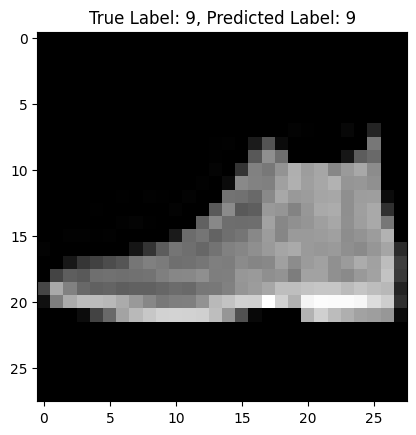

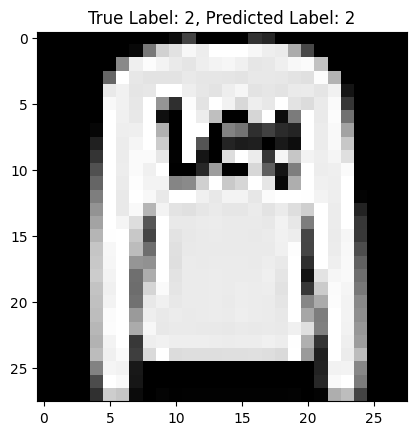

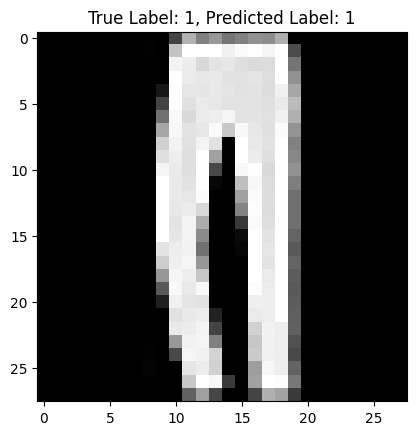

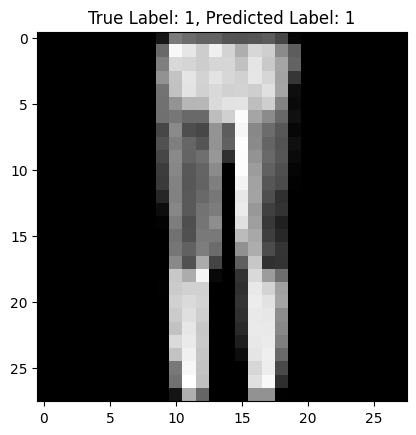

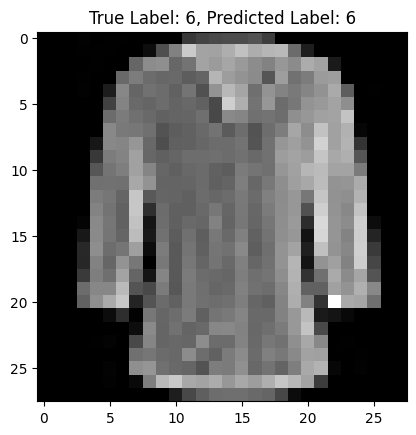

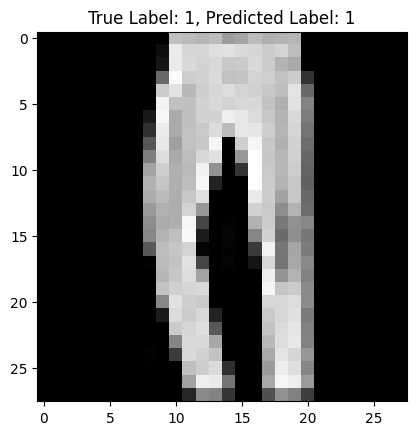

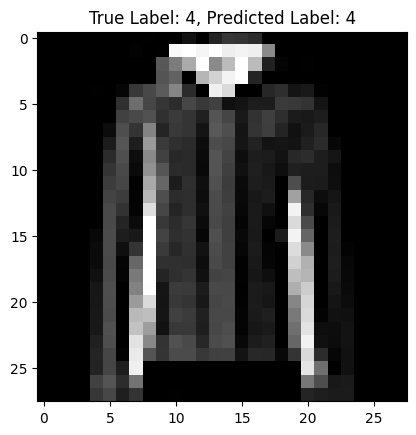

In [22]:
# Make predictions on a few test samples
predictions = model.predict(x_test[:7])
predicted_labels = np.argmax(predictions, axis=1)

# Display the predictions
for i in range(7):
    plt.imshow(x_test[i, :, :, 0], cmap='gray')
    plt.title(f'True Label: {np.argmax(y_test[i])}, Predicted Label: {predicted_labels[i]}')
    plt.show()


Epoch 1/20
938/938 [==============================] - ETA: 0s - loss: 1.0984 - accuracy: 0.5929
Epoch 1: val_accuracy improved from -inf to 0.72990, saving model to best_model.h5
938/938 [==============================] - 78s 82ms/step - loss: 1.0984 - accuracy: 0.5929 - val_loss: 0.6740 - val_accuracy: 0.7299


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/20
938/938 [==============================] - ETA: 0s - loss: 0.7872 - accuracy: 0.7060
Epoch 2: val_accuracy improved from 0.72990 to 0.77890, saving model to best_model.h5
938/938 [==============================] - 74s 79ms/step - loss: 0.7872 - accuracy: 0.7060 - val_loss: 0.5846 - val_accuracy: 0.7789
Epoch 3/20
938/938 [==============================] - ETA: 0s - loss: 0.7023 - accuracy: 0.7381
Epoch 3: val_accuracy improved from 0.77890 to 0.79260, saving model to best_model.h5
938/938 [==============================] - 73s 78ms/step - loss: 0.7023 - accuracy: 0.7381 - val_loss: 0.5522 - val_accuracy: 0.7926
Epoch 4/20
938/938 [==============================] - ETA: 0s - loss: 0.6510 - accuracy: 0.7583
Epoch 4: val_accuracy improved from 0.79260 to 0.79700, saving model to best_model.h5
938/938 [==============================] - 73s 78ms/step - loss: 0.6510 - accuracy: 0.7583 - val_loss: 0.5132 - val_accuracy: 0.7970
Epoch 5/20
938/938 [==============================] - E

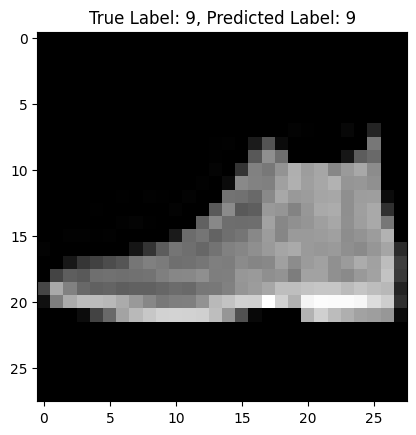

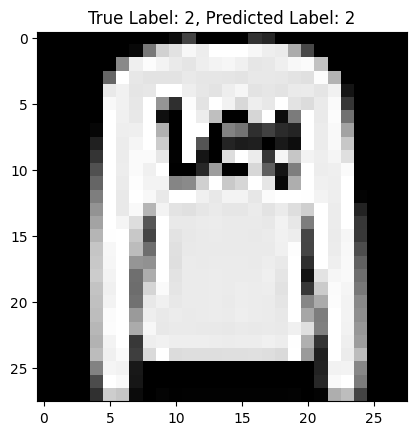

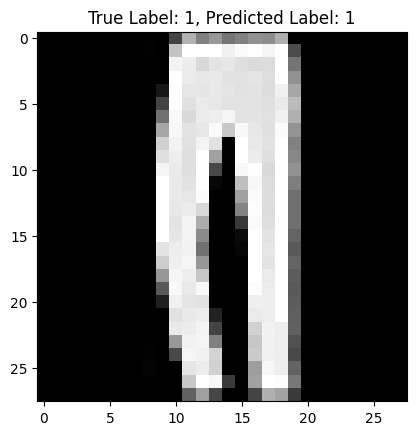

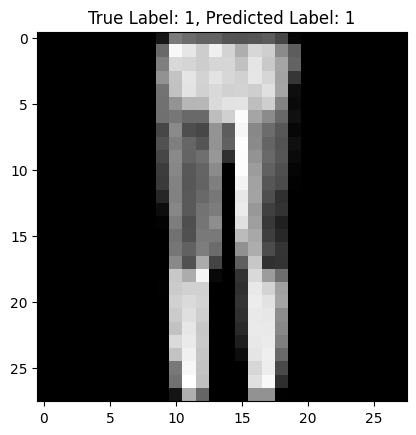

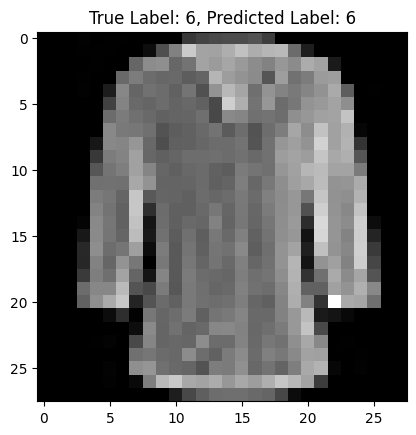

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to [0, 1] and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to include channel dimension (for grayscale images)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model Checkpointing
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint])

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Load the best model
best_model = Sequential()
best_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
best_model.add(MaxPooling2D((2, 2)))
best_model.add(Conv2D(64, (3, 3), activation='relu'))
best_model.add(MaxPooling2D((2, 2)))
best_model.add(Conv2D(64, (3, 3), activation='relu'))
best_model.add(Flatten())
best_model.add(Dense(128, activation='relu'))
best_model.add(Dropout(0.5))
best_model.add(Dense(10, activation='softmax'))
best_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
best_model.load_weights('best_model.h5')

# Make predictions on a few test samples
predictions = best_model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

# Display the predictions
for i in range(5):
    plt.imshow(x_test[i, :, :, 0], cmap='gray')
    plt.title(f'True Label: {np.argmax(y_test[i])}, Predicted Label: {predicted_labels[i]}')
    plt.show()
